In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler

import os
os.environ["OMP_NUM_THREADS"] = "6"
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("../Data/insurance2.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.shape


(1338, 8)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.describe()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
features = ['age', 'bmi', 'smoker']
X = df[features]


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

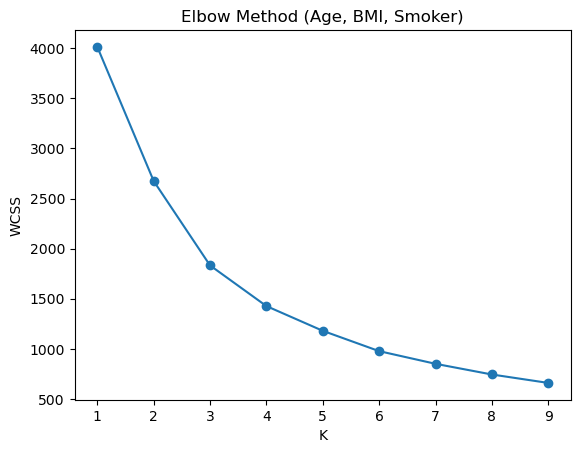

In [8]:




wcss = []

K_RANGE = range(1, 10)

for k in K_RANGE:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method (Age, BMI, Smoker)")
plt.show()


In [9]:


kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

df['risk_cluster'] = kmeans.fit_predict(X_scaled)


c:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [10]:
features = ['age','bmi','smoker']

df.groupby('risk_cluster')[features].mean()


,age,bmi,smoker
risk_cluster,,,
0,26.813953,29.433062,0.0
1,51.222628,31.799361,0.0
2,38.514599,30.708449,1.0


In [11]:
risk_map = {
    1: 'High Risk',      # smokers
    0: 'Low Risk',       # non-smoker
    2: 'Medium Risk'    # non-smoker (gender-separated)
}

df['risk_segment'] = df['risk_cluster'].map(risk_map)


In [12]:
df.groupby('risk_cluster')['charges'].mean()


risk_cluster
0     5059.759581
1    11611.725411
2    32050.231832
Name: charges, dtype: float64

In [13]:
avg_charges = df.groupby('risk_cluster')['charges'].mean()
avg_charges


risk_cluster
0     5059.759581
1    11611.725411
2    32050.231832
Name: charges, dtype: float64

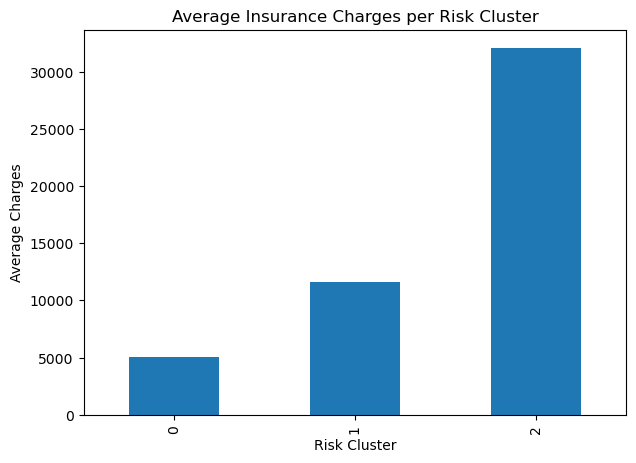

In [14]:


plt.figure(figsize=(7,5))
avg_charges.plot(kind='bar')

plt.xlabel("Risk Cluster")
plt.ylabel("Average Charges")
plt.title("Average Insurance Charges per Risk Cluster")

plt.show()


In [15]:
import joblib

joblib.dump(
    kmeans,
    r"D:\Life_Insurance_Claim_Prediction\models\risk_model.pkl"
)
print("Risk model saved successfully")


Risk model saved successfully


In [16]:
joblib.dump(
    scaler,
    r"D:\Life_Insurance_Claim_Prediction\models\scaler.pkl"
)
print("Scaler saved successfully")


Scaler saved successfully


In [17]:
joblib.load(r"D:\Life_Insurance_Claim_Prediction\models\risk_model.pkl")
joblib.load(r"D:\Life_Insurance_Claim_Prediction\models\scaler.pkl")
print("Risk model + scaler load OK")


Risk model + scaler load OK
